0.9900661159875807

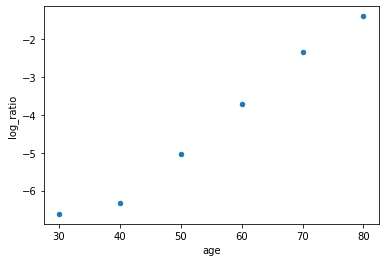

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/TimeAge.csv', index_col='date')
df = df.loc["2020-06-30"] # use the final numbers
df["age"] = df.age.str.replace("s","").astype(int)
df = df[df.age>=30] #exclude 0,10,20s because there are no deaths
df["log_ratio"] = np.log(df.deceased/df.confirmed)

df.plot.scatter(x="age",y="log_ratio")

# look at this correlation!
df.age.corr(df.log_ratio)